In [72]:
import numpy as np
import os

from numpy.random import default_rng
random=default_rng(42) 

In [74]:
# imports
import numpy as np
import os

from numpy.random import default_rng
# stabilité du notebook d'une exécution à l'autre
random=default_rng(42) 

# jolies figures directement dans le notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# où sauver les figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "workflowDS"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID) # le dossier doit exister

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [76]:
import pandas as pd
datasets = "datasets"
def load_data(file,Datasets=datasets):
    csv_path = os.path.join(Datasets, str(file))
    return pd.read_csv(csv_path)

In [77]:
general_data = load_data("general_data.csv")
employee_survey_data = load_data("employee_survey_data.csv")
in_time = load_data("in_time.csv")
manager_survey_data = load_data("manager_survey_data.csv")
out_time = load_data("out_time.csv")

In [78]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
### traiting data
general_data_traiting = general_data.copy()
general_data_traiting.drop("BusinessTravel",axis =1 ,inplace = True)
general_data_traiting.drop("Education",axis =1 ,inplace = True)
general_data_traiting.drop("EducationField",axis =1 ,inplace = True)
general_data_traiting.drop("Over18",axis =1 ,inplace = True)


In [54]:
##On remarque que  11-NumCompaniesWorked a des valeurs en plus
##general_data_traiting.drop("NumCompaniesWorked",axis =1 ,inplace = True)

In [79]:
##On remarque que  15-TotalWorkingYears a des valeurs manquantes 
##On remplace ces dernieres avec le median
median = general_data_traiting["TotalWorkingYears"].median()
general_data_traiting["TotalWorkingYears"].fillna(median, inplace=True)

In [56]:
##Implementer nos propes transformation

In [81]:
##Standarization
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
 
general_data_traiting_num = general_data_traiting.select_dtypes(include=[np.number]) 

num_attribs = list(general_data_traiting_num)
cat_attribs= ["Attrition", "Department", "Gender",  "JobRole", "MaritalStatus"]
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
         ("cat", OneHotEncoder(), cat_attribs),
    ])

general_data_preapred = full_pipeline.fit_transform(general_data_traiting)

In [82]:
employee_survey_data_traiting = employee_survey_data.copy()
median = employee_survey_data_traiting["EnvironmentSatisfaction"].median()
employee_survey_data_traiting["EnvironmentSatisfaction"].fillna(median, inplace=True)
median = employee_survey_data_traiting["JobSatisfaction"].median()
employee_survey_data_traiting["JobSatisfaction"].fillna(median, inplace=True)
median = employee_survey_data_traiting["WorkLifeBalance"].median()
employee_survey_data_traiting["WorkLifeBalance"].fillna(median, inplace=True)
num_attribs = list(employee_survey_data_traiting)
employee_survey_data_traiting.drop("EmployeeID",axis =1 ,inplace = True)
#full_pipeline = ColumnTransformer([
#       ("num", num_pipeline, num_attribs),
#    ])

#employee_survey_data_prepared = full_pipeline.fit_transform(employee_survey_data_traiting)

In [83]:
for date in in_time.columns:
    in_time[date]=pd.to_datetime(in_time[date],errors='ignore',format='%Y-%m-%d %H:%M:%S')
    out_time[date]=pd.to_datetime(out_time[date],errors='ignore',format='%Y-%m-%d %H:%M:%S')

In [84]:
work = (out_time-in_time)
work_mean_time = work.mean(axis=1)

In [85]:
manager_survey_data_traiting = manager_survey_data.copy()
manager_survey_data_traiting.drop("EmployeeID",axis =1 ,inplace = True)

In [86]:
manager_survey_data_traiting

,JobInvolvement,PerformanceRating
0,3,3
1,2,4
2,3,3
3,2,3
4,3,3
...,...,...
4405,3,3
4406,2,3
4407,3,4
4408,2,3


In [87]:
employee_survey_data_traiting

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,3.0,4.0,2.0
1,3.0,2.0,4.0
2,2.0,2.0,1.0
3,4.0,4.0,3.0
4,4.0,1.0,3.0
...,...,...,...
4405,4.0,1.0,3.0
4406,4.0,4.0,3.0
4407,1.0,3.0,3.0
4408,4.0,1.0,3.0


In [64]:
general_data_traiting

,Age,Attrition,Department,DistanceFromHome,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Sales,6,1,1,Female,1,Healthcare Representative,Married,131160,1.0,11,8,0,1.0,6,1,0,0
1,31,Yes,Research & Development,10,1,2,Female,1,Research Scientist,Single,41890,0.0,23,8,1,6.0,3,5,1,4
2,32,No,Research & Development,17,1,3,Male,4,Sales Executive,Married,193280,1.0,15,8,3,5.0,2,5,0,3
3,38,No,Research & Development,2,1,4,Male,3,Human Resources,Married,83210,3.0,11,8,3,13.0,5,8,7,5
4,32,No,Research & Development,10,1,5,Male,1,Sales Executive,Single,23420,4.0,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Research & Development,5,1,4406,Female,1,Research Scientist,Single,60290,3.0,17,8,1,10.0,5,3,0,2
4406,29,No,Research & Development,2,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,15,8,0,10.0,2,3,0,2
4407,25,No,Research & Development,25,1,4408,Male,2,Sales Executive,Married,37020,0.0,20,8,0,5.0,4,4,1,2
4408,42,No,Sales,18,1,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,14,8,1,10.0,2,9,7,8


In [88]:
work_mean_time

0      0 days 07:20:31.214592274
1      0 days 07:41:11.037974683
2      0 days 06:59:03.765432098
3      0 days 07:09:47.508474576
4      0 days 07:58:25.065040650
                  ...           
4405   0 days 08:29:14.459016393
4406   0 days 06:04:03.995867768
4407   0 days 07:40:24.288793103
4408   0 days 09:27:12.128099173
4409   0 days 06:57:32.227467811
Length: 4410, dtype: timedelta64[ns]

In [89]:
frames = [general_data_traiting, manager_survey_data_traiting, employee_survey_data_traiting ,work_mean_time]
main_data = pd.concat(frames ,axis=1)
main_data.rename( columns={0:'WorkMeanTime'}, inplace=True )

In [90]:
main_data["WorkMeanTime"] = work_mean_time.dt.total_seconds()/60/60
main_data.drop("EmployeeID", axis=1, inplace=True) 


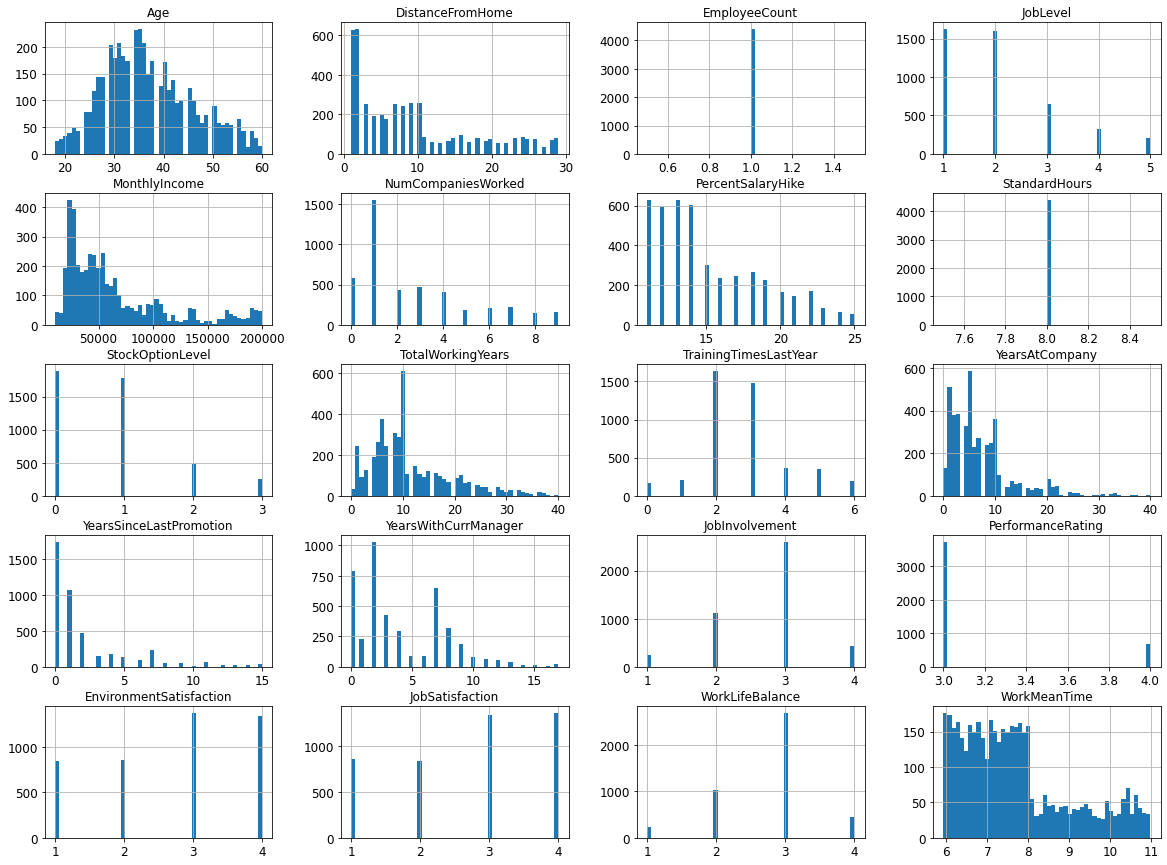

In [91]:
main_data.hist(bins=50, figsize=(20,15)) #SOLUTION
plt.show() #SOLUTION

In [93]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

X = main_data.copy()
X.drop("Attrition", axis=1, inplace=True) 
X.drop("Department", axis=1, inplace=True) 
X.drop("Gender", axis=1, inplace=True) 
X.drop("JobRole", axis=1, inplace=True) 
X.drop("MaritalStatus", axis=1, inplace=True) 
X.drop("NumCompaniesWorked", axis=1, inplace=True) 
X.drop("TotalWorkingYears", axis=1, inplace=True) 
X.drop("EnvironmentSatisfaction", axis=1, inplace=True) 
X.drop("JobSatisfaction", axis=1, inplace=True) 
X.drop("WorkLifeBalance", axis=1, inplace=True) 
X.drop("WorkMeanTime", axis=1, inplace=True) 
X.head()

,Age,DistanceFromHome,EmployeeCount,JobLevel,MonthlyIncome,PercentSalaryHike,StandardHours,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,51,6,1,1,131160,11,8,0,6,1,0,0,3,3
1,31,10,1,1,41890,23,8,1,3,5,1,4,2,4
2,32,17,1,4,193280,15,8,3,2,5,0,3,3,3
3,38,2,1,3,83210,11,8,3,5,8,7,5,2,3
4,32,10,1,1,23420,12,8,2,2,6,0,4,3,3


In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      4410 non-null   int64
 1   DistanceFromHome         4410 non-null   int64
 2   EmployeeCount            4410 non-null   int64
 3   JobLevel                 4410 non-null   int64
 4   MonthlyIncome            4410 non-null   int64
 5   PercentSalaryHike        4410 non-null   int64
 6   StandardHours            4410 non-null   int64
 7   StockOptionLevel         4410 non-null   int64
 8   TrainingTimesLastYear    4410 non-null   int64
 9   YearsAtCompany           4410 non-null   int64
 10  YearsSinceLastPromotion  4410 non-null   int64
 11  YearsWithCurrManager     4410 non-null   int64
 12  JobInvolvement           4410 non-null   int64
 13  PerformanceRating        4410 non-null   int64
dtypes: int64(14)
memory usage: 482.5 KB


In [71]:
plt.figure(figsize=(10, 7))
dendrogram(linkage(X, method='ward'), orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

KeyboardInterrupt: 

In [94]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [95]:
train_set, test_set = split_train_test(main_data, 0.2)
print(len(train_set), "train +", len(test_set), "test")

3528 train + 882 test


In [96]:
train_set

,Age,Attrition,Department,DistanceFromHome,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,WorkMeanTime
4024,34,No,Sales,14,1,Female,1,Sales Executive,Married,22350,...,2,5,1,0,3,3,3.0,4.0,3.0,8.033464
1860,37,No,Research & Development,13,1,Female,3,Human Resources,Married,35640,...,1,5,0,0,1,3,3.0,4.0,3.0,7.370777
3579,59,No,Research & Development,3,1,Male,1,Research Scientist,Single,40510,...,3,6,0,5,3,3,3.0,4.0,3.0,7.343793
3237,29,No,Sales,20,1,Female,2,Manager,Divorced,29260,...,3,2,2,2,2,3,4.0,2.0,3.0,7.062148
454,33,No,Research & Development,2,1,Male,2,Laboratory Technician,Single,34790,...,3,3,0,2,3,3,2.0,4.0,3.0,7.485017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,29,Yes,Sales,3,1,Female,2,Laboratory Technician,Single,68110,...,2,8,7,7,3,3,3.0,4.0,3.0,8.547252
437,37,Yes,Sales,10,1,Female,3,Human Resources,Married,30720,...,3,14,11,7,2,3,1.0,3.0,1.0,6.246985
491,52,Yes,Research & Development,5,1,Female,4,Human Resources,Married,14200,...,2,32,6,9,4,3,1.0,4.0,3.0,5.989539
2189,34,No,Sales,1,1,Male,2,Research Scientist,Divorced,86210,...,1,5,0,0,3,3,1.0,3.0,3.0,6.352500


In [97]:
local_df_train = train_set.copy()
local_df_test = test_set.copy()

In [98]:
local_df_train

,Age,Attrition,Department,DistanceFromHome,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,WorkMeanTime
4024,34,No,Sales,14,1,Female,1,Sales Executive,Married,22350,...,2,5,1,0,3,3,3.0,4.0,3.0,8.033464
1860,37,No,Research & Development,13,1,Female,3,Human Resources,Married,35640,...,1,5,0,0,1,3,3.0,4.0,3.0,7.370777
3579,59,No,Research & Development,3,1,Male,1,Research Scientist,Single,40510,...,3,6,0,5,3,3,3.0,4.0,3.0,7.343793
3237,29,No,Sales,20,1,Female,2,Manager,Divorced,29260,...,3,2,2,2,2,3,4.0,2.0,3.0,7.062148
454,33,No,Research & Development,2,1,Male,2,Laboratory Technician,Single,34790,...,3,3,0,2,3,3,2.0,4.0,3.0,7.485017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,29,Yes,Sales,3,1,Female,2,Laboratory Technician,Single,68110,...,2,8,7,7,3,3,3.0,4.0,3.0,8.547252
437,37,Yes,Sales,10,1,Female,3,Human Resources,Married,30720,...,3,14,11,7,2,3,1.0,3.0,1.0,6.246985
491,52,Yes,Research & Development,5,1,Female,4,Human Resources,Married,14200,...,2,32,6,9,4,3,1.0,4.0,3.0,5.989539
2189,34,No,Sales,1,1,Male,2,Research Scientist,Divorced,86210,...,1,5,0,0,3,3,1.0,3.0,3.0,6.352500


In [99]:
local_df_test

,Age,Attrition,Department,DistanceFromHome,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,WorkMeanTime
1348,51,Yes,Research & Development,6,1,Female,1,Manager,Single,15690,...,2,4,0,3,4,3,1.0,4.0,3.0,7.160143
1001,30,No,Research & Development,2,1,Male,1,Sales Representative,Married,104450,...,3,7,1,7,3,3,3.0,3.0,3.0,6.797697
1664,45,No,Research & Development,2,1,Female,4,Sales Executive,Married,44040,...,2,8,3,7,3,4,4.0,2.0,4.0,7.394377
2395,36,No,Research & Development,2,1,Female,2,Healthcare Representative,Divorced,114160,...,2,5,0,4,3,3,4.0,1.0,3.0,6.255394
2551,22,Yes,Research & Development,16,1,Female,2,Laboratory Technician,Single,35790,...,3,1,0,0,3,3,4.0,2.0,3.0,10.465410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,53,No,Research & Development,24,1,Female,3,Manager,Single,22690,...,2,14,8,10,2,3,4.0,1.0,4.0,7.076013
1936,24,No,Sales,28,1,Female,1,Healthcare Representative,Divorced,118490,...,3,4,3,2,3,3,4.0,3.0,3.0,6.524706
535,28,No,Human Resources,1,1,Male,2,Research Scientist,Divorced,63470,...,2,4,2,2,3,3,1.0,3.0,2.0,6.638264
1481,36,No,Research & Development,28,1,Male,1,Laboratory Technician,Married,33770,...,2,15,10,11,3,3,4.0,4.0,3.0,7.044916


In [100]:
attrition = main_data["Attrition"]

y_train_set = local_df_train["Attrition"]
y_train_set = y_train_set.eq('Yes').mul(1)
x_train_set = local_df_train.copy()
x_train_set.drop("Attrition", axis=1, inplace=True)


y_test_set = local_df_test["Attrition"]
y_test_set = y_test_set.eq('Yes').mul(1)
x_test_set= local_df_test.copy()
x_test_set.drop("Attrition", axis=1, inplace=True)

In [101]:
x_train_set

,Age,Department,DistanceFromHome,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,WorkMeanTime
4024,34,Sales,14,1,Female,1,Sales Executive,Married,22350,2.0,...,2,5,1,0,3,3,3.0,4.0,3.0,8.033464
1860,37,Research & Development,13,1,Female,3,Human Resources,Married,35640,5.0,...,1,5,0,0,1,3,3.0,4.0,3.0,7.370777
3579,59,Research & Development,3,1,Male,1,Research Scientist,Single,40510,5.0,...,3,6,0,5,3,3,3.0,4.0,3.0,7.343793
3237,29,Sales,20,1,Female,2,Manager,Divorced,29260,1.0,...,3,2,2,2,2,3,4.0,2.0,3.0,7.062148
454,33,Research & Development,2,1,Male,2,Laboratory Technician,Single,34790,3.0,...,3,3,0,2,3,3,2.0,4.0,3.0,7.485017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,29,Sales,3,1,Female,2,Laboratory Technician,Single,68110,0.0,...,2,8,7,7,3,3,3.0,4.0,3.0,8.547252
437,37,Sales,10,1,Female,3,Human Resources,Married,30720,5.0,...,3,14,11,7,2,3,1.0,3.0,1.0,6.246985
491,52,Research & Development,5,1,Female,4,Human Resources,Married,14200,1.0,...,2,32,6,9,4,3,1.0,4.0,3.0,5.989539
2189,34,Sales,1,1,Male,2,Research Scientist,Divorced,86210,1.0,...,1,5,0,0,3,3,1.0,3.0,3.0,6.352500


In [102]:
y_test = y_test_set
y_train = y_train_set

In [103]:
##Standarization
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
 
main_data_num = main_data.select_dtypes(include=[np.number]) 

num_attribs = list(main_data_num)
cat_attribs= [ "Department", "Gender",  "JobRole", "MaritalStatus"]
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
         ("cat", OneHotEncoder(), cat_attribs),
    ])

x_train = full_pipeline.fit_transform(x_train_set)
x_test = full_pipeline.fit_transform(x_test_set)

In [104]:
x_1 = main_data.copy()
x_1.drop("Attrition", axis=1, inplace=True)

x = full_pipeline.fit_transform(x_1)

y = main_data["Attrition"]
y = y.eq('Yes').mul(1)

### PERCEPTRON

In [111]:
from sklearn.linear_model import Perceptron
percep = Perceptron(tol=1e-3, random_state=0)
percep.fit(x_train, y_train)
percep.score(x, y)

0.780952380952381

In [112]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
percep_scores = cross_val_score(percep, x, 
                                      y, cv=10, scoring="f1")

display_scores(percep_scores)

Scores: [0.45751634 0.15730337 0.36024845 0.14035088 0.2919708  0.234375
 0.21212121 0.29824561 0.28571429 0.32432432]
Mean: 0.27621702741683674
Standard deviation: 0.09029272812128966


### MLP

In [108]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=1, max_iter=300).fit(x_train, y_train)
mlp.predict_proba(x_test[:1])

array([[0.04018543, 0.95981457]])

In [109]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
mlp_scores = cross_val_score(mlp, x, 
                                      y, cv=10, scoring="f1")

display_scores(mlp_scores)

Scores: [1.        1.        1.        0.9929078 0.9929078 1.        1.
 1.        1.        1.       ]
Mean: 0.9985815602836879
Standard deviation: 0.0028368794326241176
